In [296]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Geometric Trasformation
*Spatial Transformation:* These are transformations that are related to positions or cordinates of different pixels.

Transformations can be categorized into two:
- Linear Transformation: A function
- Non-linear Transformation

Scaling using OpenCV

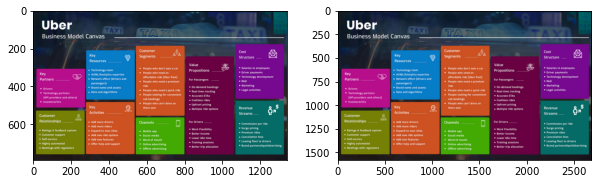

In [297]:
image = cv2.imread('images/business.jpg')
image_resized = cv2.resize(image, fx=2, fy=2, dsize=None)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(image)

plt.subplot(122)
plt.imshow(image_resized)

## Scaling as a matrix multiplication

Let's try to illustrate how scaling is applied on an image, like we said, scaling is a matrix multiplication

In [298]:
cordinate = np.array([2,4])
sx,sy = 2,2 # scaler point

scaler = np.array([[sx, 0], [0, sy]])
result = scaler.dot(cordinate) # Matrix multiplication
result

array([4, 8])

Our resultant cordinate becomes `[4,8]` after scaling, this means our cordinates have been shifted twice from point of origin `[2,4]`

### 3D scaling Excerise

In [299]:
cordinate = np.array([2,4,6])
sx, sy, sz = 3,0.5,2

scaler = np.array([[sx,0,0], [0,sy,0],[0,0,sz]])
result = scaler.dot(cordinate)
scaler, result

(array([[3. , 0. , 0. ],
        [0. , 0.5, 0. ],
        [0. , 0. , 2. ]]),
 array([ 6.,  2., 12.]))

### Image Copying and Flipping
One of the challenges associated with scaling are continous cordinates. All cordinates are expected to be discrete in order to scale.

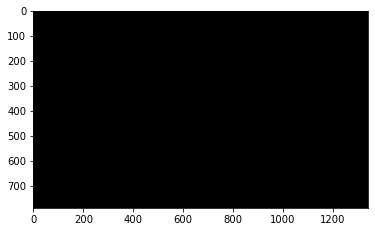

In [300]:
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
image2 = np.zeros((image.shape[0], image.shape[1]), dtype='uint8')
plt.imshow(image2, cmap='gray')

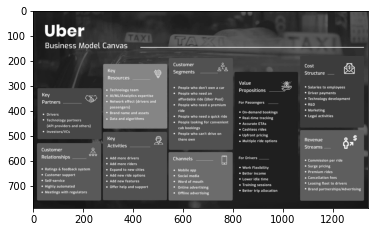

In [301]:
# Copying the image into our blank synthetic image

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image2[i,j] = image[i,j]
plt.imshow(image2, cmap='gray')

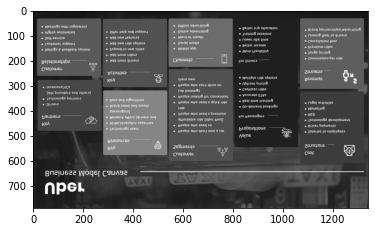

In [302]:
# Copying the image into our blank synthetic image and flipping it

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image2[image.shape[0]-i-1,j] = image[i,j]
plt.imshow(image2, cmap='gray')

Flipping can similarly be done like this below

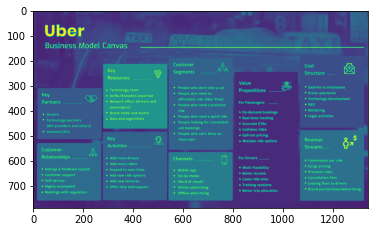

In [303]:
plt.imshow(image2[::-1, :])

## Excercise 
write a code to copy only half the row of the image

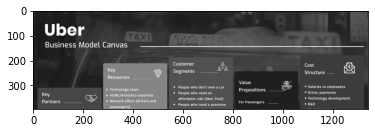

In [304]:
image2 = np.zeros((int(image.shape[0]/2), image.shape[1]), dtype=np.uint8)
for i in range(image.shape[0]//2):
    for j in range(image.shape[1]):
        image2[i,j] = image[i,j]

plt.imshow(image2, cmap='gray')

Another way much faster and efficient to do solve this excersice is this

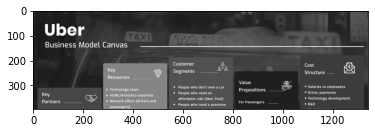

In [305]:
image2 = image[:image.shape[0]//2, :]
plt.imshow(image2, cmap='gray')

## Saturation and holes

In [306]:
new_image = np.zeros((2*image.shape[0], 2*image.shape[1]), dtype=np.uint8)
scaler = np.array([[2,0],[0,2]])

# Copy pixel intensities from from original image to new scaled image
for i in range(image.shape[0]):
    for j in range (image.shape[1]):
        cordinate = np.array([i,j])
        dot_scaler = scaler.dot(cordinate)
        new_i, new_j = dot_scaler
        new_image[new_i, new_j] = image[i,j]

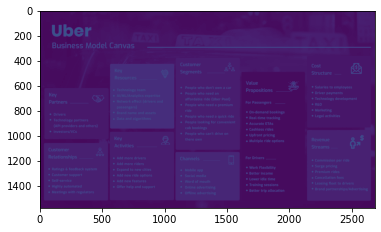

In [307]:
plt.imshow(new_image)

Now, because our image isn't been displayed in it's actual size, let's create a function to help us visualize this image in its actual size

In [308]:
def display_image(image):
    dot_per_inch = mpl.rcParams['figure.dpi']
    height, width = image.shape
    fig = plt.figure(figsize=(height/float(dot_per_inch), width/float(dot_per_inch)))
    plt.imshow(image, cmap='gray')
    plt.show()

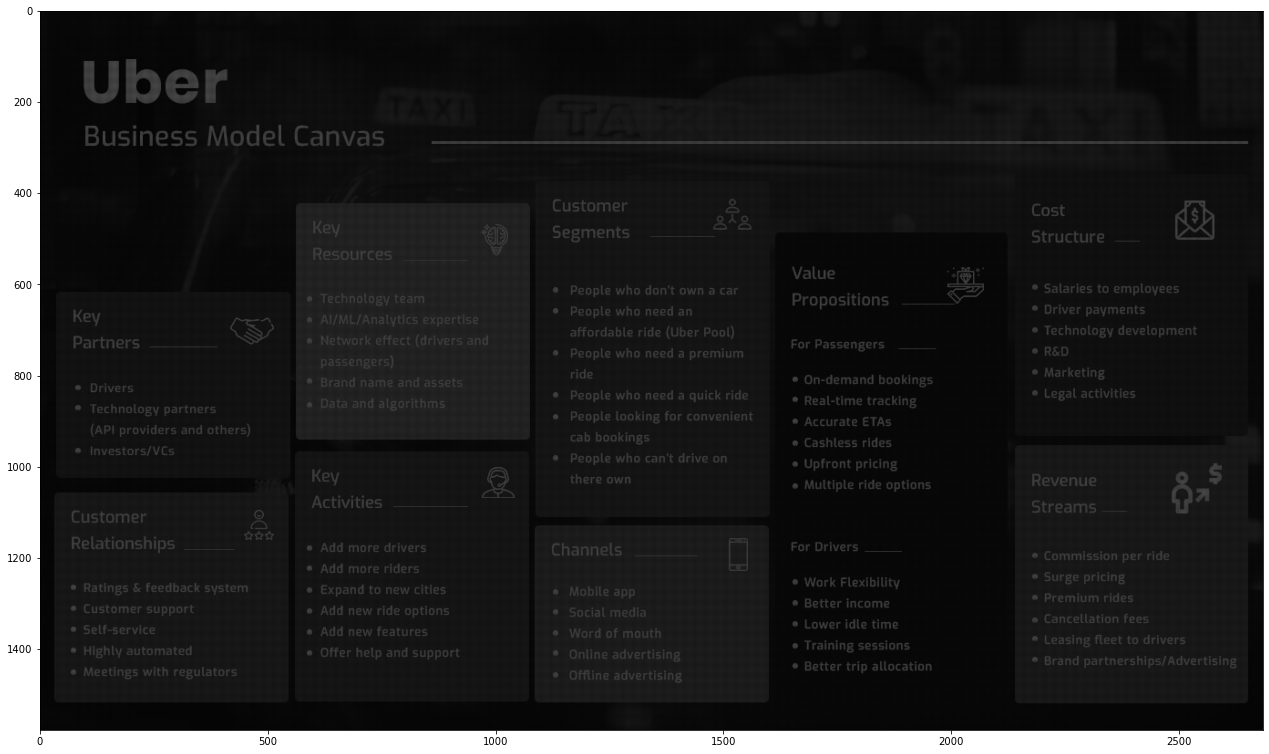

In [309]:
display_image(new_image)

In [310]:
scaler = np.array([[2,0],[0,2]])
inverse_scale = np.linalg.inv(scaler)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        cordinate = np.array([i,j])
        dot_cord = inverse_scale.dot(cordinate)
        new_i, new_j = np.int16(np.round(dot_cord))
        if i < image.shape[0] or i >=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            new_image[i,j] = image[new_i, new_j]

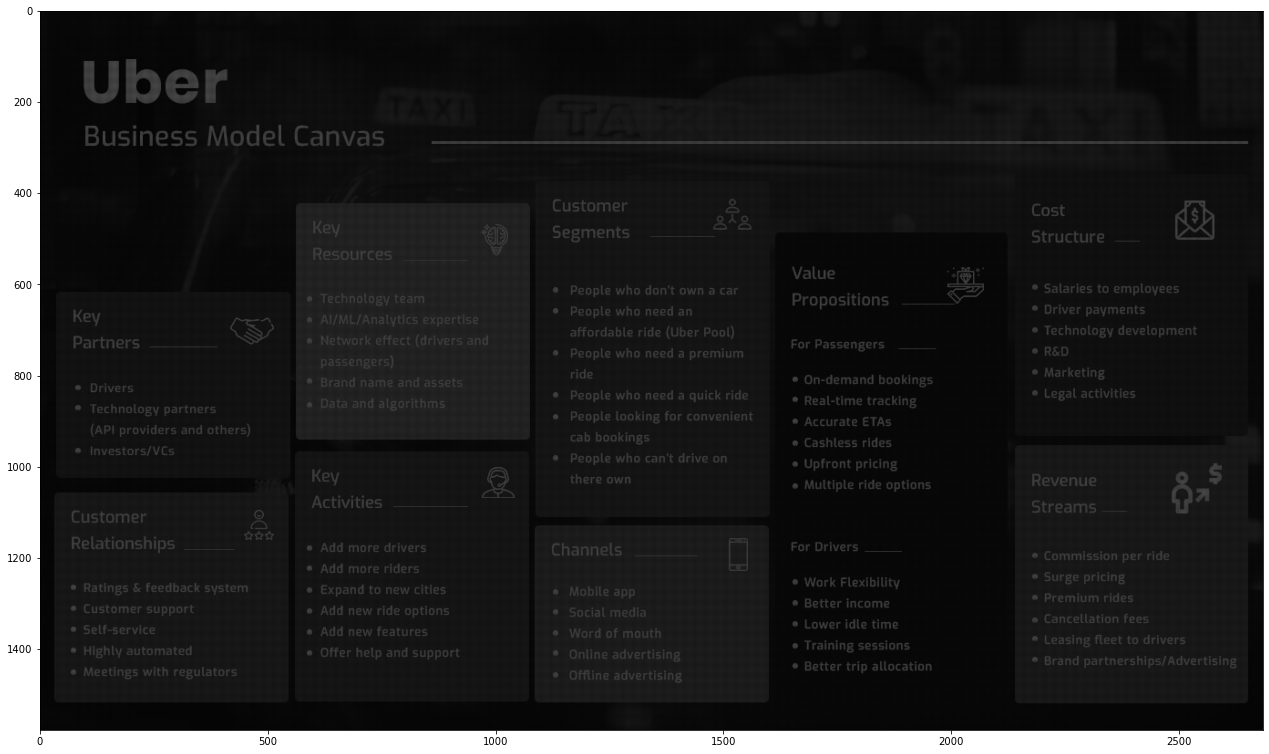

In [311]:
display_image(new_image)

## Algorithm for scaling an image
- Get an image
- setup the scale factors Sx and Sy
- Transform image extents to get the resultant image size
- Initialize the resultant image with all zeros or ones `(np.zeroes() or np.ones())`
- Computer the inverse transformation matrix
- Foreach pixel location `(a,b)` resultant image:
    - Apply inverse transformation on `(a,b)` an get `(c,d)` in the source image
    - Apply interpolation on `(c,d)` and get intensity `g`
    - Copy intensity `g` on location `(a,b)` in the resultant image

## Bilinear Interpolation Algorithm

In [312]:
def bilinear_interpolation(row, column, image):
    
    left_column = int(column)
    right_column = left_column +1
    weight_for_right_col = column - left_column
    weight_for_left_col = right_column - column
    
    top_row = int(row)
    bottom_row = top_row + 1
    weight_for_top_row = bottom_row - row
    weight_for_bottom_row = row - top_row
    
    if top_row >= 0 and bottom_row < image.shape[0] and left_column >= 0 and right_column<image.shape[1]:
        angle_a = (weight_for_left_col * image[top_row, left_column]) + (weight_for_right_col * [top_row, right_column])
        angle_b = weight_for_left_col * image[bottom_row, left_column] + weight_for_right_col * [bottom_row, right_column]

        result = weight_for_top_row * angle_a + weight_for_bottom_row * angle_b
        return result
    else:
        return 0

# Apply bilinear transformation to an image
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
empty_image = np.zeros((2*image.shape[0], 2*image.shape[1]), dtype=np.uint8)
scaler = np.array([[2,0], [0,2]])
inverse_scaler = np.linalg.inv(scaler)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        point = np.array([i,j])
        dot_point = inverse_scaler.dot(point)
        new_i, new_j = dot_point

        if i < 0 or i >=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            g = bilinear_interpolation(new_i,new_j, image)
            empty_image[i, j] = g


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

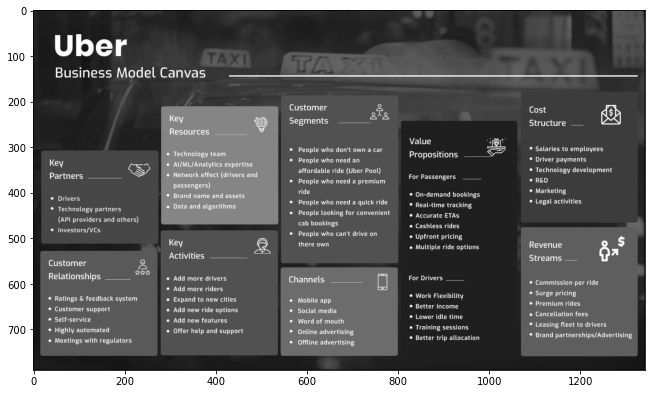

In [ ]:
from config import BilinearInterpolation
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
bilinear = BilinearInterpolation(image, 1)
display_image(bilinear.core_transform())